In [37]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Open the JSON file
with open('average_data/dash_frag100res1080fps30bit6gop2loss0delay0bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

In [39]:
# Open the JSON file
with open('average_data/dash_frag100res1080fps30bit6gop2loss5delay0bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

In [40]:
# Open the JSON file
with open('average_data/dash_frag100res1080fps30bit6gop2loss7delay0bw100 (avg).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

In [41]:
# Extract the first index values for the other metrics
metrics = ['avg_total_frames', 'avg_rendered_frames', 
           'avg_percentage_rendered_frames', 'avg_skipped_frames',
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_behindLive', 'avg_buffer',
           'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_received_bitrate', 'avg_fps']

# Initialize dictionary to store metric values
metric_values = {metric: [] for metric in metrics}

# Extract values for each dataframe
for df in [df_data_0, df_data_1, df_data_2]:
    for metric in metrics:
        metric_values[metric].append(df[metric].iloc[0])

# Metrics Comparison
print("\n=== Metrics Comparison ===")
for metric in metrics:
    values = metric_values[metric]
    print("{}: {:.2f} vs {:.2f} vs {:.2f}".format(
        metric, values[0], values[1], values[2]
    ))


=== Metrics Comparison ===
avg_total_frames: 1781.33 vs 1785.67 vs 1788.67
avg_rendered_frames: 1708.67 vs 1758.00 vs 1758.67
avg_percentage_rendered_frames: 95.92 vs 98.45 vs 98.32
avg_skipped_frames: 72.67 vs 27.67 vs 30.00
avg_num_of_stall_events: 73.00 vs 27.67 vs 29.33
avg_stall_duration: 975.00 vs 2770.67 vs 3786.33
avg_behindLive: 67.30 vs 268.38 vs 440.85
avg_buffer: 74.85 vs 246.50 vs 403.00
avg_total_time: 142.15 vs 514.89 vs 843.84
avg_25th_percentile_total_time: 128.33 vs 297.92 vs 500.00
avg_50th_percentile_total_time: 138.33 vs 436.67 vs 742.00
avg_75th_percentile_total_time: 154.33 vs 635.42 vs 1099.33
avg_std_dev_total_time: 20.14 vs 305.91 vs 439.40
avg_received_bitrate: 6.00 vs 6.00 vs 6.00
avg_fps: 30.00 vs 30.00 vs 30.00


In [42]:
pd.options.display.float_format = '{:.2f}'.format
table_data = {
    '0 %': [
        df_data_0['avg_rendered_frames'].iloc[0] / 1800 * 100,
        1800 - df_data_0['avg_rendered_frames'].iloc[0],
        df_data_0['avg_stall_duration'].iloc[0],
        df_data_0['avg_total_time'].iloc[0]
    ],
    '5 %': [
        df_data_1['avg_rendered_frames'].iloc[0] / 1800 * 100,
        1800 - df_data_1['avg_rendered_frames'].iloc[0],
        df_data_1['avg_stall_duration'].iloc[0],
        df_data_1['avg_total_time'].iloc[0]
    ],
    '7 %': [
        df_data_2['avg_rendered_frames'].iloc[0] / 1800 * 100,
        1800 - df_data_2['avg_rendered_frames'].iloc[0],
        df_data_2['avg_stall_duration'].iloc[0],
        df_data_2['avg_total_time'].iloc[0]
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Stall Duration (ms)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
table


,0 %,5 %,7 %
Frame Render Rate (%),94.93,97.67,97.70
Number of Skipped Frames,91.33,42.00,41.33
Stall Duration (ms),975.00,2770.67,3786.33
Average Latency (ms),142.15,514.89,843.84


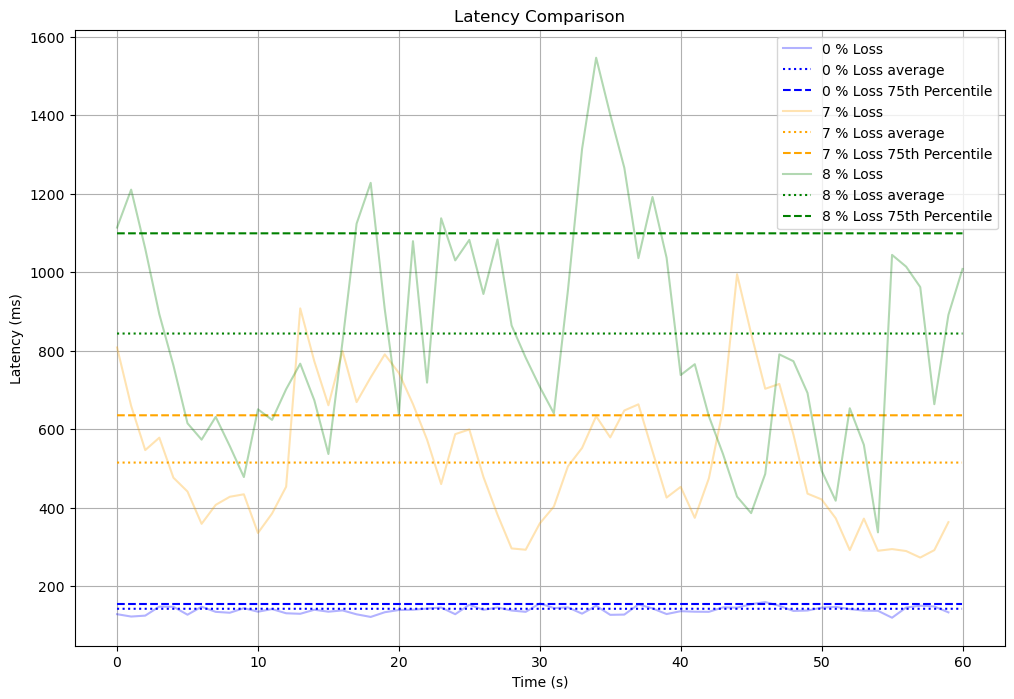

In [43]:
# Extract the continuous data
timestamps_0 = df_data_0['second']
timestamps_1 = df_data_1['second']
timestamps_2 = df_data_2['second']

total_time_0 = df_data_0['totalLatency']
total_time_1 = df_data_1['totalLatency']
total_time_2 = df_data_2['totalLatency']

# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 30  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, 'second', 'totalLatency', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, 'second', 'totalLatency', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_2, 'second', 'totalLatency', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='0 % Loss', color='blue', alpha=0.3)
plt.plot(df_data_0['second'], [df_data_0['avg_total_time'].iloc[0]] * len(df_data_0), label='0 % Loss average', color='blue', linestyle='dotted')
plt.plot(df_data_0['second'], [df_data_0['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_0), label='0 % Loss 75th Percentile', color='blue', linestyle='dashed')

plt.plot(timestamps_1, smoothed_1, label='7 % Loss', color='orange', alpha=0.3)
plt.plot(df_data_1['second'], [df_data_1['avg_total_time'].iloc[0]] * len(df_data_1), label='7 % Loss average', color='orange', linestyle='dotted')
plt.plot(df_data_1['second'], [df_data_1['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_1), label='7 % Loss 75th Percentile', color='orange', linestyle='dashed')

plt.plot(timestamps_2, smoothed_2, label='8 % Loss', color='green', alpha=0.3)
plt.plot(df_data_2['second'], [df_data_2['avg_total_time'].iloc[0]] * len(df_data_2), label='8 % Loss average', color='green', linestyle='dotted')
plt.plot(df_data_2['second'], [df_data_2['avg_75th_percentile_total_time'].iloc[0]] * len(df_data_2), label='8 % Loss 75th Percentile', color='green', linestyle='dashed')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()
